In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set_theme(style="darkgrid", font = "monospace")

Exercise: Curve fitting of temperature data

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celsius):
```python
max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18
min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58
```
Plot these temperature extremes.

Define a function that can describe min and max temperatures. Hint: this function has to have a period of 1 year. Hint: include a time offset.

1. Fit this function to the data with scipy.optimize.curve_fit().

2. Plot the result. Is the fit reasonable? If not, why?

3. Is the time offset for min and max temperatures the same within the fit accuracy?

[-37.71075225  25.20712458   4.84644107]
[27.62925851 10.63955647  5.27409434]


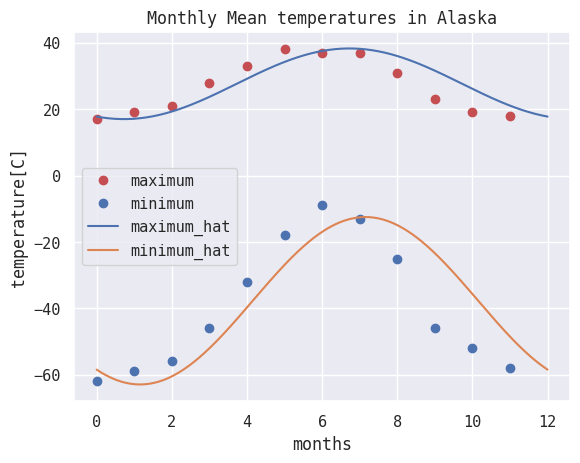

In [ ]:
maxs = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mins = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
plt.plot(months, maxs, 'ro')
plt.plot(months, mins, 'bo')
plt.title("Monthly Mean temperatures in Alaska")
plt.xlabel("months")
plt.ylabel("temperature[C]")



def approximater(times, avg, ampl, time_offset):
    return avg + ampl*np.cos((times + time_offset)* 2* np.pi / times.max())


min_params, _ = sp.optimize.curve_fit(approximater, months, mins, p0 = [-40, 10, 4])
max_params, _ = sp.optimize.curve_fit(approximater, months, maxs, p0 = [10, 10, 4]) # p0 is the initial guess

print(min_params)
print(max_params)


daily = np.linspace(0, 12, 365)
plt.plot(daily,  approximater(daily, *max_params))
plt.plot(daily,  approximater(daily, *min_params))

plt.legend(["maximum", "minimum", "maximum_hat", "minimum_hat"]);


Exercise: 2-D minimization

![six hump](https://lectures.scientific-python.org/_images/sphx_glr_plot_2d_minimization_002.png)

The six-hump camelback function

$f(x, y) = (4 - 2.1x^2 + \frac{x^4}{3})x^2 + xy + (4y^2 - 4)y^2$

has multiple local minima. Find a global minimum (there is more than one, each with the same value of the objective function) and at least one other local minimum.

Hints:

Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.

`numpy.meshgrid()` and `matplotlib.pyplot.imshow()` can help with visualization.

Try minimizing with `scipy.optimize.minimize()` with an initial guess of (x, y) = (0, 0). Does it find the global minimum, or converge to a local minimum? What about other initial guesses?

Try minimizing with `scipy.optimize.differential_evolution()`.

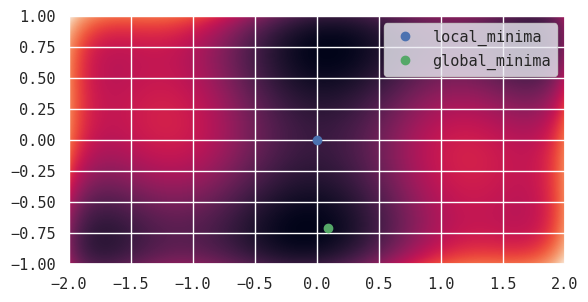

In [34]:
grid = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 1, 1000))

def six_hump(input):
    x, y = input
    return (4 - 2.1 * x**2 + x**4/3)*x**2 + x*y + (4*y**2 - 4)*y**2

plt.imshow(six_hump(grid), extent=[-2,2,-1,1])


local_minima = sp.optimize.minimize(six_hump, x0 = (0, 0)) # x0 is the initial guess, it is a local minimum though
global_minima = sp.optimize.minimize(six_hump, x0 = (-.5, -.5), bounds = [(-0.5, 0.5), (-1, -.5)]) # bounds is the area on which the optimizer will look on to optimise, it can take us to a global minimum if we do near initialisation

plt.plot(local_minima.x[0], local_minima.x[1], 'bo')
plt.plot(global_minima.x[0], global_minima.x[1], 'go')
plt.legend(["local_minima", "global_minima"]);


Exercise: Probability distributions

Generate 1000 random variates from a gamma distribution with a shape parameter of 1. Hint: the shape parameter is passed as the first argument when freezing the distribution. Plot the histogram of the sample, and overlay the distribution’s PDF. Estimate the shape parameter from the sample using the fit method.

Extra: the distributions have many useful methods. Explore them using tab completion. Plot the cumulative density function of the distribution, and compute the variance.

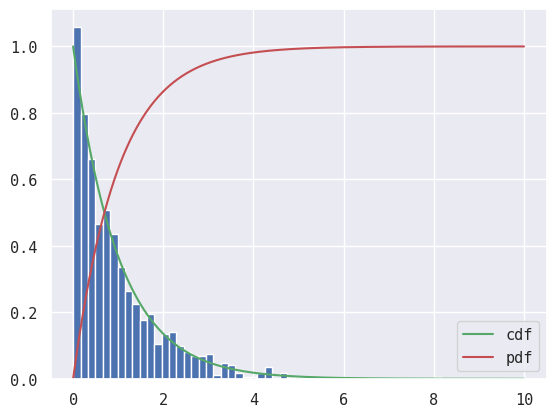

In [55]:
gamma = sp.stats.gamma(1)
sample = gamma.rvs(1000, random_state = 42)
plt.hist(sample, density = True, bins = 50)

x = np.linspace(0, 10, 1000)
plt.plot(x, gamma.pdf(x), 'g-')
plt.plot(x, gamma.cdf(x), 'r-')
plt.legend(["cdf", "pdf"]);

## Summary Exercises

### Maximum wind speed prediction at the Sprogø station

Max wind speed for every 50 years:  32.97989825386221


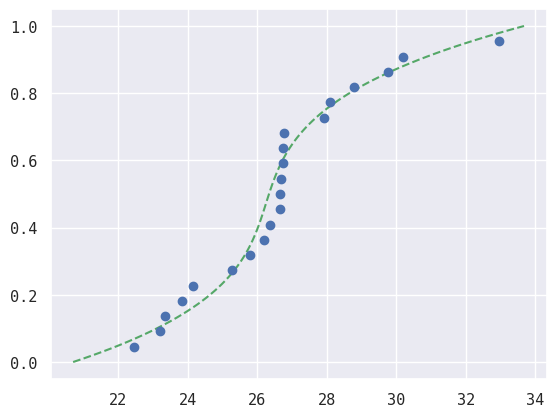

In [114]:
max_speeds = np.load('data/max-speeds.npy')
years_nb = len(max_speeds)

cum_prob =  (np.arange(years_nb, dtype=np.float32) + 1)/(years_nb+1)

sorted_max_speeds = np.sort(max_speeds)

quantile_func = sp.interpolate.UnivariateSpline(cum_prob, sorted_max_speeds)
n_prob = np.linspace (0,1,100)
fitted_max_speeds = quantile_func(n_prob)

plt.plot(fitted_max_speeds, n_prob, "g--")
plt.plot(sorted_max_speeds, cum_prob, 'bo')

max_speed_for_next_50_yrs = quantile_func(0.98)
print("Max wind speed for every 50 years: ", max_speed_for_next_50_yrs)

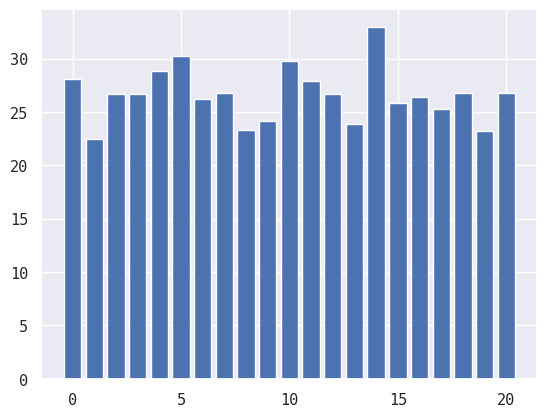

In [182]:
wind_speeds = np.load("data/sprog-windspeeds.npy")
years_nb = 21
max_speeds = np.array([arr.max() for arr in np.array_split(wind_speeds, years_nb)])
plt.bar(np.arange(21), max_speeds);


In [183]:
cum_prob =  (np.arange(years_nb, dtype=np.float32) + 1)/(years_nb+1)
cum_prob = -np.log(-np.log(cum_prob))
quantile_func = sp.interpolate.UnivariateSpline(cum_prob, np.sort(max_speeds), k =1 )

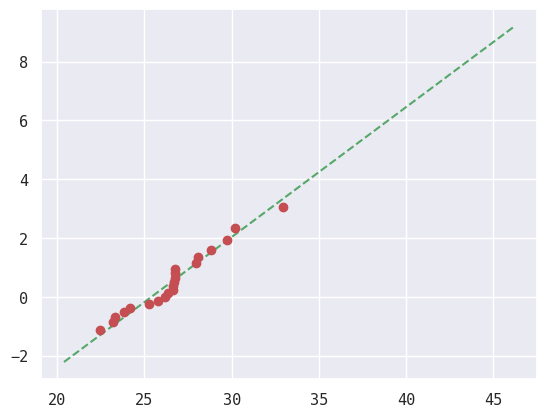

In [184]:
n_prob = -np.log(-np.log(np.linspace(1e-4,1-1e-4, 100)))
plt.plot(quantile_func(n_prob), n_prob, "g--")
plt.plot(np.sort(max_speeds), cum_prob, "ro");

In [185]:
quantile_func(-np.log(-np.log(49/50)))

array(34.23106176)

#### Non linear least squares curve fitting: application to point extraction in topographical lidar data

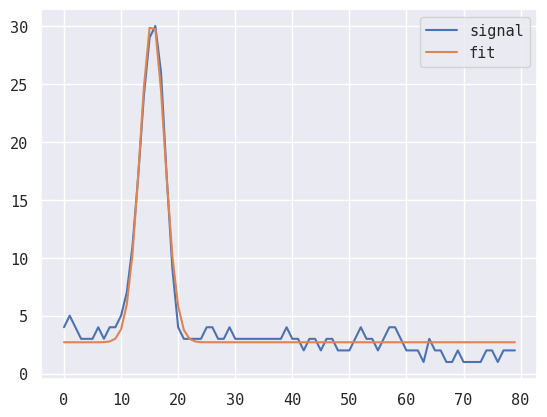

In [202]:
waveform = np.load("data/waveform_1.npy")
plt.plot(np.arange(len(waveform)), waveform);

def model(t, noise, amplitude, mean, std_dev):
    return noise + amplitude* np.exp(- ((t - mean)/(std_dev))**2)

params, _ =  sp.optimize.curve_fit(model, np.arange(len(waveform), dtype=np.float32), waveform, p0 = [3,39,15,2]) 

plt.plot(np.arange(len(waveform)), model(np.arange(len(waveform)), *params))
plt.legend(["signal", "fit"]);


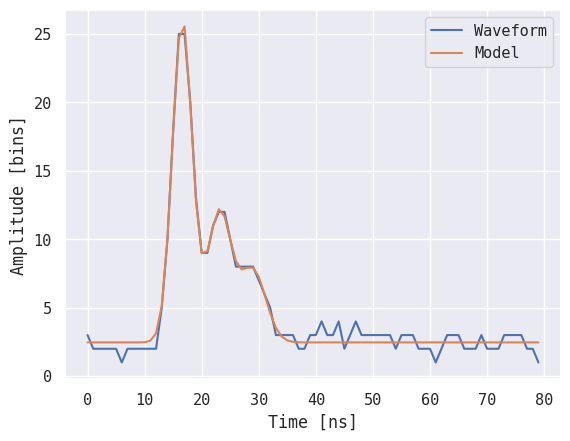

In [214]:
def model(t, coeffs):
    return (
        coeffs[0]
        + coeffs[1] * np.exp(-(((t - coeffs[2]) / coeffs[3]) ** 2))
        + coeffs[4] * np.exp(-(((t - coeffs[5]) / coeffs[6]) ** 2))
        + coeffs[7] * np.exp(-(((t - coeffs[8]) / coeffs[9]) ** 2))
    )


def residuals(coeffs, y, t):
    return y - model(t, coeffs)


waveform_2 = np.load("data/waveform_2.npy")
t = np.arange(len(waveform_2))

x0 = np.array([3, 30, 20, 1, 12, 25, 1, 8, 28, 1], dtype=float)
x, _ = sp.optimize.leastsq(residuals, x0, args=(waveform_2, t))

plt.plot(t, waveform_2, t, model(t, x))
plt.xlabel("Time [ns]")
plt.ylabel("Amplitude [bins]")
plt.legend(["Waveform", "Model"])
plt.show()